In [107]:
import matplotlib.pyplot as plt

In [191]:
import pandas as pd

In [192]:
df = pd.read_csv("timeseries/madison-ig-posts.csv")
df.head()

,Date,Sexual
0,11/2/2019,True
1,10/20/2019,False
2,9/23/2019,False
3,9/14/2019,True
4,9/2/2019,False


In [193]:
from datetime import datetime

def get_date(s):
    return datetime.strptime(s, "%m/%d/%Y")

def get_month(s):
    return get_date(s).month

def get_day(s):
    return get_date(s).day

In [194]:
df["Month"] = [get_month(s) for s in df.Date]
df["Day"]   = [get_day(s) for s in df.Date]
df.head()

,Date,Sexual,Month,Day
0,11/2/2019,True,11,2
1,10/20/2019,False,10,20
2,9/23/2019,False,9,23
3,9/14/2019,True,9,14
4,9/2/2019,False,9,2


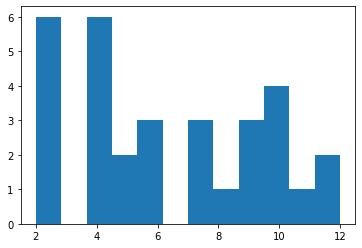

In [195]:
plt.hist(x=df.Month, bins=12);

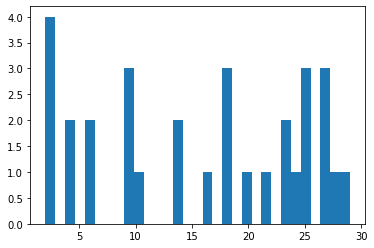

In [196]:
plt.hist(x=df.Day, bins=31);

In [197]:
first_post = get_date(df.Date[len(df.Date)-1])

from datetime import timedelta

def get_index(s):
    return (get_date(s) - first_post).days

def get_z(n):
    return (first_post + timedelta(days=int(n)))

df["Time"] = [get_index(s) for s in df.Date]

df.head()

,Date,Sexual,Month,Day,Time
0,11/2/2019,True,11,2,1057
1,10/20/2019,False,10,20,1044
2,9/23/2019,False,9,23,1017
3,9/14/2019,True,9,14,1008
4,9/2/2019,False,9,2,996


In [198]:
df.head()

,Date,Sexual,Month,Day,Time
0,11/2/2019,True,11,2,1057
1,10/20/2019,False,10,20,1044
2,9/23/2019,False,9,23,1017
3,9/14/2019,True,9,14,1008
4,9/2/2019,False,9,2,996


In [199]:
df["Probability"] = [1 for _ in range(len(df.Date))]

In [200]:
df.to_csv("test_data.csv")

In [201]:
df.head()

,Date,Sexual,Month,Day,Time,Probability
0,11/2/2019,True,11,2,1057,1
1,10/20/2019,False,10,20,1044,1
2,9/23/2019,False,9,23,1017,1
3,9/14/2019,True,9,14,1008,1
4,9/2/2019,False,9,2,996,1


In [202]:
df.to_csv("raw_data.csv")

In [203]:

def create_row(n):
    time_str = datetime.strftime(get_z(n), "%m/%d/%Y")
    
    if len(df[df.Time == get_index(time_str)]):
        return df
    
    return df.append({
        "Date": time_str,
        "Probability": 0,
        "Sexual": False,
        "Gen": 1,
        "Time": get_index(time_str),
        "Month": get_month(time_str),
        "Day": get_day(time_str)
    }, ignore_index=True)
    
for i in range(df.Time[0]):
    df = create_row(i)
    
df["Date"] = [get_date(s) for s in df.Date]

In [204]:
df

,Date,Sexual,Month,Day,Time,Probability,Gen
0,2019-11-02,True,11,2,1057,1,NaN
1,2019-10-20,False,10,20,1044,1,NaN
2,2019-09-23,False,9,23,1017,1,NaN
3,2019-09-14,True,9,14,1008,1,NaN
4,2019-09-02,False,9,2,996,1,NaN
...,...,...,...,...,...,...,...
1053,2019-10-28,False,10,28,1052,0,1.0
1054,2019-10-29,False,10,29,1053,0,1.0
1055,2019-10-30,False,10,30,1054,0,1.0
1056,2019-10-31,False,10,31,1055,0,1.0


In [205]:
df.to_csv("raw_data.csv")

1111

In [207]:
def get_next_sixty(t):
    current_i = get_index(t)
    return [current_i + i for i in range(0, 60)]

In [221]:
n = get_next_sixty("12/26/2019")

def month_z(n):
    return get_z(n).month
    
def day_z(n):
    return get_z(n).day
    

val = pd.DataFrame({"Time": n, "Month": [month_z(i) for i in n], "Day": [day_z(i) for i in n]})
val.head()
val.to_csv("test.csv")